## Predicting whether a student will Pass or Fail his High school using RandomForest Ensemble Supervised Learning and Using PCA for dimensionality reduction 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("student-mat.csv",sep=";")
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

### Now, Let's perform binning of the target column G3 having range of values from (0-20) to categorise whether the student has failed(<=7) or passed

In [3]:
df["G3_Binned"]=pd.cut(df['G3'],[-1,7,20],labels=['F','P'])
df.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 G3_Binned  
0  ...        3     4     1     1       3        6   5   6   6         F  
1  ...        3     3     1     1       3        4   5   5   6         F  
2  ...        3     2     2     3       3       10   7   8  10         P  
3  ...        2     2     1     1       5        2  15  14  15         P  
4  ...        3     2     1     2       5        4   6  10  10         P  
5  ...        4     2     1     2       5       10  15  15  15         P  
6  ...        4     4     1     1       3        0  12  12  11         P  
7  ...        1     4     1     1       1        6   6   5   6         F  
8  ...        2     2     1     1       1        0  16  18  19         P  
9  ...        5     1     1     1       5        0  14  15  15         P  

[10 rows x 34 columns]

### From this we can see that a new column G3_Binned has been added. This newly added columns consists the corresponding grades of the student Next, let's subset the dataframe into the features that we are gonna use for the classification .

In [4]:
df_new=df[['school','sex','reason','Pstatus','studytime','failures','famsup','paid','higher','internet','romantic','Dalc','health','absences','G1','G2','G3','G3_Binned',]]
df_new.head()           

school sex  reason Pstatus  studytime  failures famsup paid higher internet  \
0     GP   F  course       A          2         0     no   no    yes       no   
1     GP   F  course       T          2         0    yes   no    yes      yes   
2     GP   F   other       T          2         3     no  yes    yes      yes   
3     GP   F    home       T          3         0    yes  yes    yes      yes   
4     GP   F    home       T          2         0    yes  yes    yes       no   

  romantic  Dalc  health  absences  G1  G2  G3 G3_Binned  
0       no     1       3         6   5   6   6         F  
1       no     1       3         4   5   5   6         F  
2       no     2       3        10   7   8  10         P  
3      yes     1       5         2  15  14  15         P  
4       no     1       5         4   6  10  10         P

In [5]:
df_new.isnull().sum(axis = 0)



school       0
sex          0
reason       0
Pstatus      0
studytime    0
failures     0
famsup       0
paid         0
higher       0
internet     0
romantic     0
Dalc         0
health       0
absences     0
G1           0
G2           0
G3           0
G3_Binned    0
dtype: int64

### From this, we can see that the  null values are dealt with completely. So we can move forward with our wrangling .

In [6]:
#Now, let's convert the categorical values into numenrcial so that they can be fed into the model
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [7]:
df_new['school'] = le.fit_transform(df_new['school'])
df_new['sex'] = le.fit_transform(df_new['sex'])
df_new['reason'] = le.fit_transform(df_new['reason'])
df_new['Pstatus'] = le.fit_transform(df_new['Pstatus'])
df_new['famsup'] = le.fit_transform(df_new['famsup'])
df_new['paid'] = le.fit_transform(df_new['paid'])
df_new['higher'] = le.fit_transform(df_new['higher'])
df_new['internet'] = le.fit_transform(df_new['internet'])
df_new['romantic'] = le.fit_transform(df_new['romantic'])
df_new['G3_Binned'] = le.fit_transform(df_new['G3_Binned'])

df_new.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

school  sex  reason  Pstatus  studytime  failures  famsup  paid  higher  \
0       0    0       0        0          2         0       0     0       1   
1       0    0       0        1          2         0       1     0       1   
2       0    0       2        1          2         3       0     1       1   
3       0    0       1        1          3         0       1     1       1   
4       0    0       1        1          2         0       1     1       1   

   internet  romantic  Dalc  health  absences  G1  G2  G3  G3_Binned  
0         0         0     1       3         6   5   6   6          0  
1         1         0     1       3         4   5   5   6          0  
2         1         0     2       3        10   7   8  10          1  
3         1         1     1       5         2  15  14  15          1  
4         0         0     1       5         4   6  10  10          1

In [8]:
st=preprocessing.StandardScaler()
df_new['studytime']=st.fit_transform(df_new[['studytime']])
df_new['absences']=st.fit_transform(df_new[['absences']])
df_new['G1']=st.fit_transform(df_new[['G1']])
df_new['G2']=st.fit_transform(df_new[['G2']])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all co

In [9]:
df_new.columns

Index(['school', 'sex', 'reason', 'Pstatus', 'studytime', 'failures', 'famsup',
       'paid', 'higher', 'internet', 'romantic', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'G3_Binned'],
      dtype='object')

In [10]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 G3_Binned  
0        3     4     1     1       3        6   5   6   6         F  
1        3     3     1     1       3        4   5   5   6         F  
2        3     2     2     3       3       10   7   8  10         P  
3        2     2     1     1       5        2  15  14  15         P  
4        3     2     1     2       5        4   6  10  10         P  

[5 rows x 34 columns]

### For better understanding the encoded values, Fail-0 Pass-1

In [11]:
print(df_new['G3_Binned'].value_counts(),df['G3_Binned'].value_counts())

1    325
0     70
Name: G3_Binned, dtype: int64 P    325
F     70
Name: G3_Binned, dtype: int64


In [12]:
#Let's try including all the features and see how Random Forest can perofrom
X=df_new
y=df_new['G3_Binned']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### PCA (Principal Component Analysis)

### The explained_variance below helps us understand how much information in the feature set is captured by the given number of components. Using this we choose the ideal value of components to be used in our model. 

In [14]:
#PCA
#Now PCA is run here without specifying to capture the explainedd variance of the feature set.
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train= pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

[0.71916271 0.07048726 0.04699855 0.03972761 0.02893422 0.02213515
 0.01580174 0.01294019 0.00920862 0.0071061  0.00606066 0.00536223
 0.0044131  0.00308046 0.00295311 0.00259614 0.00169393 0.00133823]


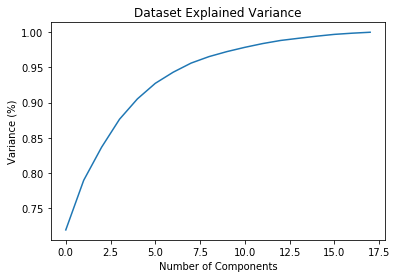

In [15]:
print(explained_variance)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [18]:
#PCA final
#According to the explained variance curve, a componenet value of 9 captures most of the variance of the dataset, therefore let's run the algorithm with 9
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X_train= pca.fit_transform(X_train)
X_test= pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

### Now the data is ready for modelling

#### The previously recorded score for SVM without PCA  is an accuracy of 94.94% let's see if the accuracy has increased after using PCA

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,C=1,decision_function_shape="ovo")
classifier.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### The parameter tuning has been done , Let's put the model in action and test it on the test set

In [24]:
from sklearn.metrics import accuracy_score
ypred=classifier.predict(X_test)
print("Accuracy:",100*accuracy_score(y_test,ypred),"%")

Accuracy: 100.0 %


### The accuracy recorded on the test set is 100%  . PCA has brought in an accuracy increase of 5%(95%-100%). This is a great effect that PCA has had on SVM giving us a final accuracy of 100%.